# Penjualan Mobil

By <em><b>Peni Ismail</b></em>

Dataset diambil dari website (source : https://triatmono.info/data-penjualan-tahun-2012/data-penjualan-mobil-2017/)

Source Code dapat diambil di <b>github</b> : https://github.com/peny77/Final-Project

Data Penjualan mobil antara tahun 2010 sampai 2017, Penjualan mobil yang dibahas di projek ini adalah Toyota, Daihatsu, Honda, Mitsubishi, Suzuki, Others(merk lainnya)

### Pertama yang dilakukan adalah meload data dari file data set penjualan_mobil.csv

File penjualan mobil berapa pada layanan Amazon Web Service yaitu S3 dengan alamat s3://penyismail/FinalProject/

In [3]:
import s3fs
import numpy as np
import pandas as pd

s3 = s3fs.S3FileSystem()
with s3.open('penyismail/FinalProject/penjualan_mobil.csv', mode='rb') as f:
        mobil = pd.read_csv(f)
mobil.head()

,Periode,Bulan,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
0,2010,Januari,20803,8302,3755,6855,4815,8301,52831
1,2010,Februari,21800,7518,4431,8246,4638,9055,55688
2,2010,Maret,26287,8084,5179,9068,6203,10734,65555
3,2010,April,24422,9298,5154,9560,6013,10785,65232
4,2010,Mei,21050,9485,4439,9544,6043,9959,60520


### Mengecek format data pada kolom

Langkah yang selanjutnya adalah melakukan pengecekan format data pada dataset

In [3]:
mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
Periode       96 non-null int64
Bulan         96 non-null object
Toyota        96 non-null int64
Daihatsu      96 non-null int64
Honda         96 non-null int64
Mitsubishi    96 non-null int64
Suzuki        96 non-null int64
Others        96 non-null int64
Total         96 non-null int64
dtypes: int64(8), object(1)
memory usage: 6.8+ KB


### Mengkonversi kolom ke dalam list dan menampilkan nama-nama kolomnya.

untuk memudahkan membaca kolom yang terdapat dalam dataset

In [4]:
print(list(mobil.columns))

['Periode', 'Bulan', 'Toyota', 'Daihatsu', 'Honda', 'Mitsubishi', 'Suzuki', 'Others', 'Total']


### Mengecek Check Data Signifiance

Dengan cara ini kita dapat mengetahui dan membaca berapa (count, mean, std, min, dan max)

In [4]:
mobil.describe()

,Periode,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2013.500000,30317.104167,13915.802083,10126.958333,10633.489583,9778.125000,12375.010417,87136.072917
std,2.303316,6082.893173,2757.972545,5316.961560,2257.090521,3061.219974,3550.188074,15412.861896
min,2010.000000,13535.000000,6652.000000,1553.000000,5678.000000,4638.000000,5959.000000,49147.000000
25%,2011.750000,25818.750000,12582.250000,5157.000000,8932.000000,7242.000000,9442.250000,76440.500000
50%,2013.500000,30959.500000,14444.000000,9243.000000,10581.000000,9346.500000,12057.000000,88653.500000
75%,2015.250000,34814.000000,15793.000000,14902.000000,12381.250000,12105.750000,15448.750000,97365.500000
max,2017.000000,40806.000000,20445.000000,20475.000000,15291.000000,16902.000000,19209.000000,115973.000000


### Membuat scatter_matrix

Dibuatnya Scatter Matrix agar kita dapat mengetahui pola plot dan persebaran data, sehingga kita dapat memilih untuk dijadikan target untuk dibuat model baik Linear dan atau NonLinear

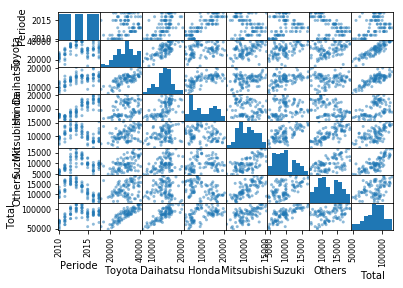

In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(mobil)
plt.show()

### Membuat Scatter Plot

Untuk melihat lebih jelas plot data pada masing-masing feature yang ada dalam dataset kita membuat perbandingannya yang ditunjukan dengan beberapa Scatter Plot dibawah ini

Scatter Plot Korelasi antara Total dengan Toyota


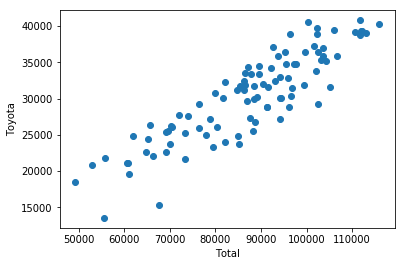

Scatter Plot Korelasi antara Total dengan Daihatsu


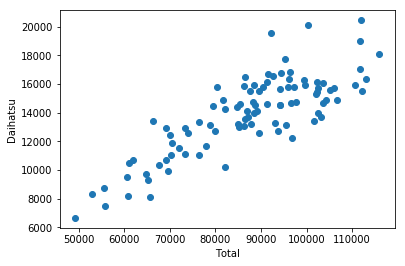

Scatter Plot Korelasi antara Total dengan Honda


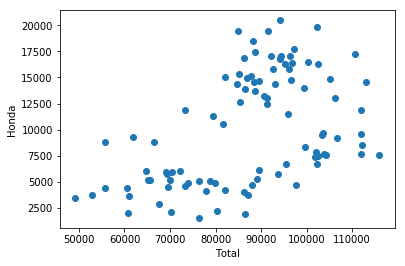

Scatter Plot Korelasi antara Total dengan Mitsubishi


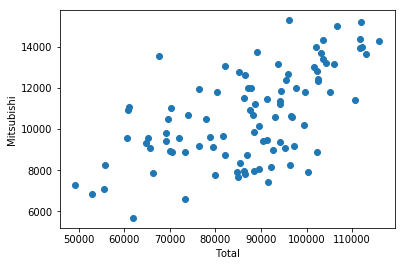

Scatter Plot Korelasi antara Total dengan Suzuki


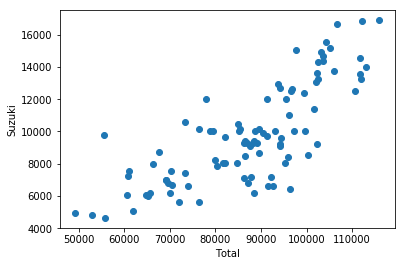

Scatter Plot Korelasi antara Total dengan Others


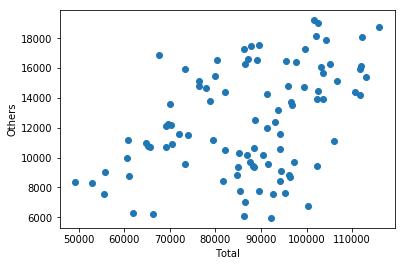

In [7]:
import matplotlib.pyplot as plt

print('Scatter Plot Korelasi antara Total dengan Toyota')
plt.scatter(mobil['Total'], mobil['Toyota'])
plt.xlabel("Total") 
plt.ylabel("Toyota") 
plt.show()

print('Scatter Plot Korelasi antara Total dengan Daihatsu')
plt.scatter(mobil['Total'], mobil['Daihatsu'])
plt.xlabel("Total") 
plt.ylabel("Daihatsu") 
plt.show()

print('Scatter Plot Korelasi antara Total dengan Honda')
plt.scatter(mobil['Total'], mobil['Honda'])
plt.xlabel("Total") 
plt.ylabel("Honda") 
plt.show()

print('Scatter Plot Korelasi antara Total dengan Mitsubishi')
plt.scatter(mobil['Total'], mobil['Mitsubishi'])
plt.xlabel("Total") 
plt.ylabel("Mitsubishi") 
plt.show()

print('Scatter Plot Korelasi antara Total dengan Suzuki')
plt.scatter(mobil['Total'], mobil['Suzuki'])
plt.xlabel("Total") 
plt.ylabel("Suzuki") 
plt.show()

print('Scatter Plot Korelasi antara Total dengan Others')
plt.scatter(mobil['Total'], mobil['Others'])
plt.xlabel("Total") 
plt.ylabel("Others") 
plt.show()

Dari Scatter Plot di atas kita akan memilih 2 Feature yang akan di analisis, Indikasi adanya korelasi antar variabel adalah dari pola scatterplot yang membentuk garis diagonal

Berdasarkan pola data dari scatter plot diatas, pilihan 2 features yang memiliki dugaan kuat ada korelasi adalah 
* Total penjualan mobil Toyota, plot data tersebut terdapat korelasi antara total penjualan dengan merk mobil Toyota
* Total penjualan mobil Suzuki, plot data tersebut terdapat korelasi antara total penjualan dengan merk mobil Suzuki


### Statistik Deskriptif 

Membuat statistik deskriptif dari scatter plot yang dipilih

<b>Statistik Deskriptif Toyota

In [8]:
import statistics

toyota_points = mobil['Toyota']

# Menghitung mean
statistics.mean(toyota_points)
print (statistics.mean(toyota_points))

"""
# Menghitung mode
statistics.mode(toyota_points)
print (statistics.mode(toyota_points))
"""

# Menghitung median
statistics.median(toyota_points)
print (statistics.median(toyota_points))

# Menghitung median_low
statistics.median_low(toyota_points)
print (statistics.median_low(toyota_points))

# Menghitung median_high
statistics.median_high(toyota_points)
print (statistics.median_high(toyota_points))

# Menghitung median_grouped
statistics.median_grouped(toyota_points)
print (statistics.median_grouped(toyota_points))

# Menghitung variance 
statistics.variance(toyota_points)
print (statistics.variance(toyota_points))

# Menghitung pvariance
statistics.pvariance(toyota_points)
print (statistics.pvariance(toyota_points))

# Menghitung stdev
statistics.stdev(toyota_points)
print (statistics.stdev(toyota_points))

# Menghitung pstdev
statistics.pstdev(toyota_points)
print (statistics.pstdev(toyota_points))

30317.104166666668
30959.5
30728
31191
31190.5
37001589.35745614
36616156.13498264
6082.893173273401
6051.128500947789


Hasil dari statistik deskriptif dari data penjualan Mobil Toyota menunjukkan bahwa :

* Mean = 30317.104166666668
* Median = 30959.5
* Median_low = 30728
* Median_high = 31191
* Median_grouped = 31190.5
* Variance = 37001589.35745614
* PVariance = 36616156.13498264
* STDev = 6082.893173273401
* PSTDev = 6051.128500947789

<b>Statistik Deskriptif Suzuki

In [8]:
import statistics

suzuki_points = mobil['Suzuki']

# Menghitung mean
statistics.mean(suzuki_points)
print (statistics.mean(suzuki_points))

"""
# Menghitung mode
statistics.mode(toyota_points)
print (statistics.mode(toyota_points))
"""

# Menghitung median
statistics.median(suzuki_points)
print (statistics.median(suzuki_points))

# Menghitung median_low
statistics.median_low(suzuki_points)
print (statistics.median_low(suzuki_points))

# Menghitung median_high
statistics.median_high(suzuki_points)
print (statistics.median_high(suzuki_points))

# Menghitung median_grouped
statistics.median_grouped(suzuki_points)
print (statistics.median_grouped(suzuki_points))

# Menghitung variance 
statistics.variance(suzuki_points)
print (statistics.variance(suzuki_points))

# Menghitung pvariance
statistics.pvariance(suzuki_points)
print (statistics.pvariance(suzuki_points))

# Menghitung stdev
statistics.stdev(suzuki_points)
print (statistics.stdev(suzuki_points))

# Menghitung pstdev
statistics.pstdev(suzuki_points)
print (statistics.pstdev(suzuki_points))

9778.125
9346.5
9288
9405
9404.5
9371067.731578948
9273452.442708334
3061.2199743858573
3045.2343822287858


Hasil dari statistik deskriptif dari data penjualan Mobil Suzuki menunjukkan bahwa :

* Mean = 9778.125
* Median = 9346.5
* Median_low = 9288
* Median_high = 9405
* Median_grouped = 9404.5
* Variance = 9371067.731578948
* PVariance = 9273452.442708334
* STDev = 3061.2199743858573
* PSTDev = 3045.2343822287858

### Analisis model regresi (linear atau nonlinear)

#### Regresi Linear

Estimated coefficients:
b_0 = 29.884326159208285 \nb_1 = 0.34758532059934466


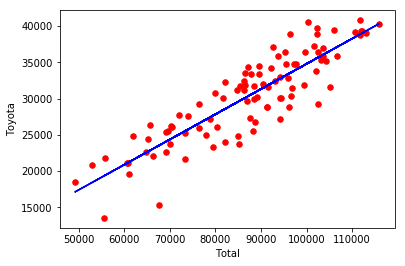

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "r", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "b") 
  
    # putting labels 
    plt.xlabel('Total') 
    plt.ylabel('Toyota') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    x = np.array(mobil['Total']) 
    y = np.array(mobil['Toyota']) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {} \\nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main()

Terbentuk garis linear dengan Estimated coefficients: 
* b_0 = 29.884326159208285
* b_1 = 0.34758532059934466

Dari model tersebut kita akan mencari Visual Evaluation dengan mencari berapa <i>Mean Absolute Error</i>(MAE), <i>Mean Squared Error</i>(MSE) dan R2 Score

In [19]:
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

toyota_points = mobil['Toyota']
prediction = mobil['Total']

# Menghitung mean absolute error
mae = mean_absolute_error(toyota_points, prediction)
print(mae)

# Menghitung mean squared error
mse = mean_squared_error(toyota_points, prediction)
print(mse)

# Menghitung r2
r2 = r2_score(toyota_points, prediction)
print(r2)

56818.96875
3336671190.21875
-90.12565442200894


Didapat dari perhitungan code diatas  adalah
* Mean Absolute Error = 56818.96875
* Mean Squared Error = 3336671190.21875
* R2 Score = -90.12565442200894

Untuk lebih merinci perhitungannya kita dapat menggunakan <b>OLS Regression</b> dengan mengimport module <b>statsmodels.api</b>

In [21]:
import numpy as np
import statsmodels.api as sm

x, y = np.array(mobil['Toyota']), np.array(mobil['Total'])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.096e+04
Date:                Tue, 27 Aug 2019   Prob (F-statistic):          6.17e-100
Time:                        02:02:16   Log-Likelihood:                -1001.4
No. Observations:                  96   AIC:                             2005.
Df Residuals:                      95   BIC:                             2007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8495      0.027    104.680      0.0

#### Regresi NonLinear

In [32]:
def expo(x, Beta_1, Beta_2):
     #y = Beta_1 * np.exp(x-Beta_2*x)
     y = Beta_1 / (Beta_2 + np.exp(-x))
     return y

In [33]:
x_data, y_data = (mobil["Total"].values, mobil["Suzuki"].values)

In [34]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [35]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(expo, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % tuple (popt))

 beta_1 = 0.131460, beta_2 = -0.232587


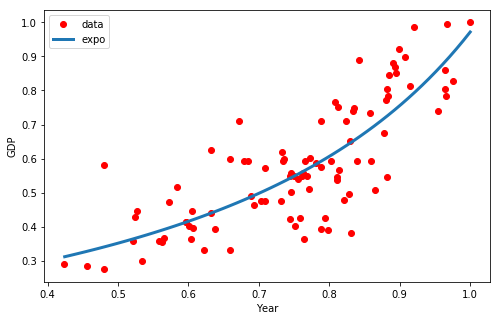

In [84]:
x = np.linspace(140, 330, 60)
x = x/max(x)
plt.figure(figsize=(8,5))
y = expo(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='expo')
plt.legend(loc='best')
plt.ylabel('Total')
plt.xlabel('Suzuki')
plt.show()

Terbentuk curve fir exponensial dengan Estimated coefficients: 
* beta_1 = 0.131460
* beta_2 = -0.232587

Dari model tersebut kita akan mencari Visual Evaluation dengan mencari berapa <i>Mean Absolute Error</i>(MAE), <i>Mean Squared Error</i>(MSE) dan R2 Score

In [10]:
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

toyota_points = mobil['Suzuki']
prediction = mobil['Total']

# Menghitung mean absolute error
mae = mean_absolute_error(toyota_points, prediction)
print(mae)

# Menghitung mean squared error
mse = mean_squared_error(toyota_points, prediction)
print(mse)

# Menghitung r2
r2 = r2_score(toyota_points, prediction)
print(r2)

77357.94791666667
6155862162.802083
-662.8155747099781


Didapat dari perhitungan code diatas  adalah
* Mean Absolute Error = 77357.94791666667
* Mean Squared Error = 6155862162.802083
* R2 Score = -662.8155747099781

Untuk lebih merinci perhitungannya kita dapat menggunakan <b>OLS Regression</b> dengan mengimport module <b>statsmodels.api</b>

In [22]:
import numpy as np
import statsmodels.api as sm

x, y = np.array(mobil['Suzuki']), np.array(mobil['Total'])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2361.
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           6.76e-69
Time:                        02:03:07   Log-Likelihood:                -1073.6
No. Observations:                  96   AIC:                             2149.
Df Residuals:                      95   BIC:                             2152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.4702      0.174     48.586      0.0

### Membuat Analisis Classification

In [17]:
print(mobil.groupby('Periode').size())

Periode
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
dtype: int64


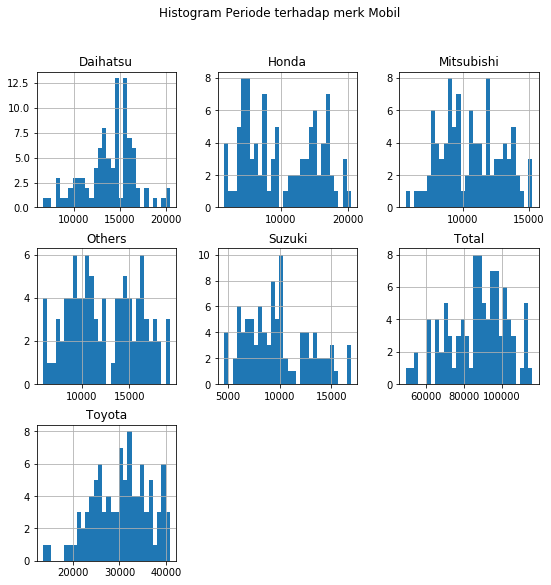

In [18]:
import pylab as pl
mobil.drop('Periode' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram Periode terhadap merk Mobil")
#plt.savefig('periode_hist')
plt.show()

Text(0.5, 0.98, 'Scatter-matrix Periode terhadap merk Mobil')

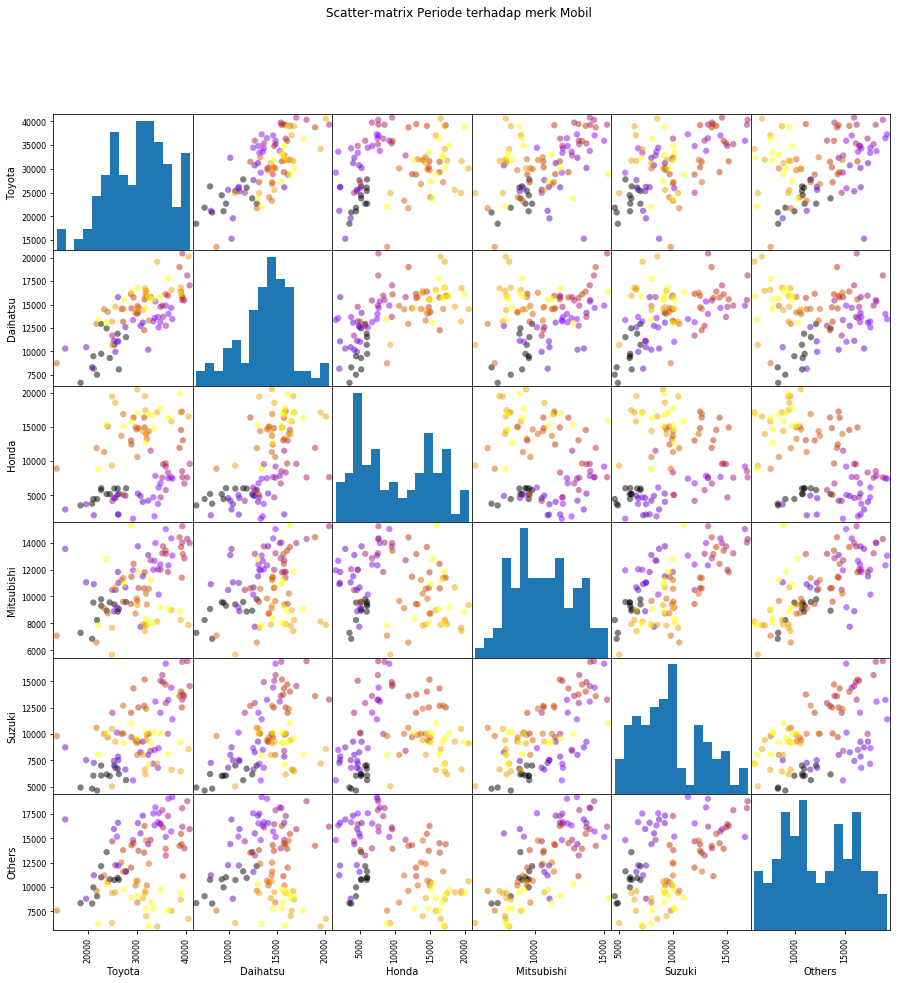

In [23]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Toyota', 'Daihatsu', 'Honda', 'Mitsubishi','Suzuki','Others']
X = mobil[feature_names]
y = mobil['Periode']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,15), cmap = cmap)
plt.suptitle('Scatter-matrix Periode terhadap merk Mobil')

Langkah selanjutnya yaitu membuat X_train, X_test, y_train, y_test yang akan digunakan kedalam Klasifikasinya nantinya

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Kita membuat Training set dan Tes set, untuk nantinya kita bandingkan mana yang akan cocok untuk digunakan. Dari kode dibawah ini kita akan mencari <b>Score</b> dari beberapa klasifikasi yaitu 
  * DecisionTreeClassifier
  * KNeighborsClassifier
  * LinearDiscriminantAnalysis
  * GaussianNB
  * SVC

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

"""
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
"""

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67
Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.58
Accuracy of LDA classifier on training set: 0.81
Accuracy of LDA classifier on test set: 0.58
Accuracy of GNB classifier on training set: 0.76
Accuracy of GNB classifier on test set: 0.50
Accuracy of SVM classifier on training set: 0.47
Accuracy of SVM classifier on test set: 0.25


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'\npred = knn.predict(X_test)\nprint(confusion_matrix(y_test, pred))\nprint(classification_report(y_test, pred))\n'

#### Kesimpulan 

Berdasarkan Klasifikasi yang telah di lakukan menghasilkan :
* <b>Decision Tree classifier</b>
* Accuracy of Decision Tree classifier on training set: <b>1.00</b>
* Accuracy of Decision Tree classifier on test set: <b>0.58</b>

* <b>K-NN classifier</b>
* Accuracy of K-NN classifier on training set: <b>0.68</b>
* Accuracy of K-NN classifier on test set: <b>0.58</b>

* <b>LDA classifier</b>
* Accuracy of LDA classifier on training set: <b>0.81</b>
* Accuracy of LDA classifier on test set: <b>0.58</b>

* <b>GNB classifier</b>
* Accuracy of GNB classifier on training set: <b>0.76</b>
* Accuracy of GNB classifier on test set: <b>0.50</b>

* <b>SVM classifier</b>
* Accuracy of SVM classifier on training set: <b>0.47</b>
* Accuracy of SVM classifier on test set: <b>0.25</b>

Dari hasil diatas dapat disimpulkan bahwa Klasifikasi dengan menggunakan <b>Decision Tree classifier</b> lebih disarankan karena <b>Score</b> yang di dapatkan 0.58 dengan Test Set bahkan 1.0 dengan Training Set